In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/fraudTest.csv')

In [ ]:
print("Initial Data Shape:", df.shape)

Initial Data Shape: (555719, 23)


In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
fraud_counts = df['is_fraud'].value_counts()
print(f"Total Non-Fraud (0): {fraud_counts.get(0, 0)}")
print(f"Total Fraud (1): {fraud_counts.get(1, 0)}")


Total Non-Fraud (0): 553574
Total Fraud (1): 2145


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
print("\nUnique values:\n", df.nunique())


Unique values:
 Unnamed: 0               555719
trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64


In [ ]:
df.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)

In [ ]:
from datetime import datetime

In [ ]:
# Convert 'dob' to datetime (invalid values will become NaT)
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

In [ ]:
# Get current year dynamically
current_year = datetime.now().year

In [ ]:
# Now safely extract year and compute age
df['age'] = current_year - df['dob'].dt.year

In [ ]:
# Drop 'dob' if no longer needed
df.drop('dob', axis=1, inplace=True)

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df.drop('trans_date_trans_time', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['gender', 'job', 'category', 'merchant', 'city', 'state']:
    df[col] = le.fit_transform(df[col].astype(str))


In [ ]:
from geopy.distance import geodesic

In [ ]:
def calculate_distance(row):
    try:
        return geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).km
    except:
        return 0

In [ ]:
df['distance'] = df.apply(calculate_distance, axis=1)


In [ ]:
df.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df['is_fraud']
X = df.drop('is_fraud', axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print("Class Distribution Before Resampling:")
print(Counter(y_train))

Class Distribution Before Resampling:
Counter({0: 442859, 1: 1716})


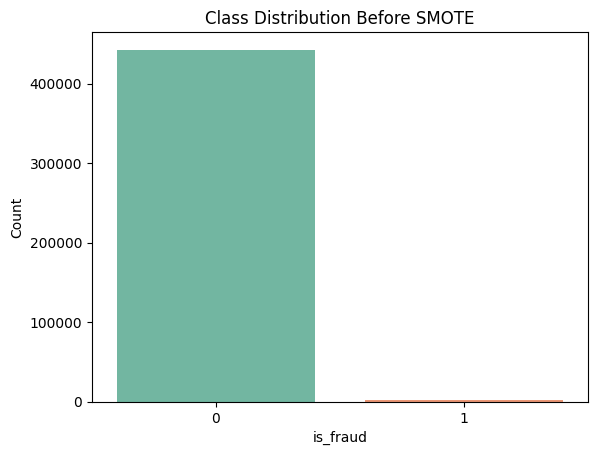

In [ ]:
sns.countplot(x=y_train, hue=y_train, palette='Set2', legend=False)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Class Distribution After SMOTE:")
print(Counter(y_train_resampled))

Class Distribution After SMOTE:
Counter({0: 442859, 1: 442859})


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_features = X_train_resampled.shape[1]
pca = PCA(n_components=n_features, random_state=42)


In [ ]:
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

In [ ]:
print("Original df shape:", df.shape)  # (555719, 15)
print("X_train shape before SMOTE:", X_train.shape)
print("X_train shape after SMOTE:", X_train_resampled.shape)


Original df shape: (555719, 15)
X_train shape before SMOTE: (444575, 14)
X_train shape after SMOTE: (885718, 14)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train_pca, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
y_pred = lr_model.predict(X_test_pca)
y_prob = lr_model.predict_proba(X_test_pca)[:, 1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9332037716835817
Precision: 0.042391730995682324
Recall: 0.7552447552447552
F1 Score: 0.0802775024777007
ROC-AUC: 0.8624199116002395
Confusion Matrix:
 [[103396   7319]
 [   105    324]]


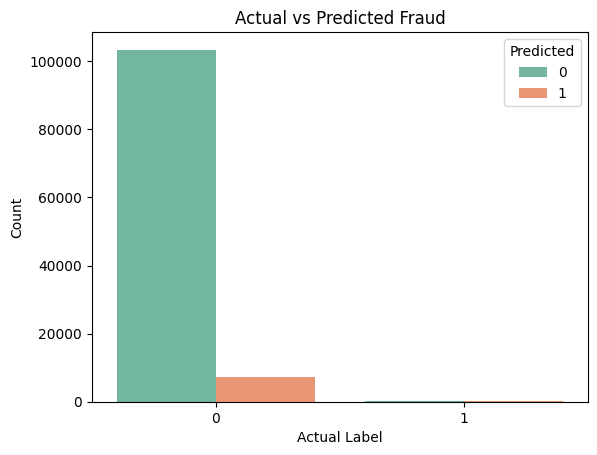

In [ ]:
sns.countplot(x=y_test, hue=y_pred, palette='Set2')
plt.title('Actual vs Predicted Fraud')
plt.xlabel('Actual Label')
plt.ylabel('Count')
plt.legend(title='Predicted')
plt.show()